# Analiza Exploratorie a Datelor și Modelarea Riscului de Boală de Inimă

**Autor:** Lungu Cristian-Eduard

**Academie:** CEGEKA - ING Academy 2025

**Data:** 6 iulie 2025

**Set de date:** UCI Heart Disease Dataset


## Introducere

Acest notebook realizează o **analiză exploratorie a datelor (EDA)** pentru setul de date **„UCI Heart Disease Dataset”**, cu scopul de a înțelege mai bine factorii care contribuie la apariția și evoluția bolilor de inimă. Analiza urmărește identificarea tiparelor, distribuțiilor și corelațiilor între variabile, care pot oferi indicii valoroase în procesul de luare a deciziilor medicale sau în construirea de modele predictive.

Vom aplica o serie de tehnici statistice și vizuale pentru a analiza variabilele individuale (analiză univariată) și relațiile dintre ele (analiză bivariată și multivariată), punând accent pe curățarea datelor, tratarea valorilor lipsă, identificarea și gestionarea outlierilor. Prin exemple concrete, cum este cazul variabilei `colesterol`, unde s-au observat valori extreme eliminate pentru a îmbunătăți distribuția. Se vor evidenția transformările aplicate asupra datelor pentru a asigura acuratețea analizelor.

La finalul procesului, setul de date curățat și procesat va fi utilizat pentru **antrenarea unui model de regresie**, cu scopul de a prezice probabilitatea sau severitatea unei boli cardiace (`target_inima`), pe baza variabilelor explicative din set.

## Pașii parcurși în acest notebook:

1. **Înțelegerea datelor și a problemei de business**
2. **Colectarea și pregătirea datelor**
3. **Explorarea datelor**
4. **Antrenarea și evaluarea modelului de regresie liniară**
5. **Referințe**
6. **Contribuții**

## 1. Înțelegerea datelor și a problemei de business



Pentru această etapă, importăm următoarele pachete:

- **pandas**: pentru manipularea datelor, stocarea acestora în tabele (DataFrame-uri).
- **scikit-learn(sklearn)**: pentru învățare automată și analize avansate, cum ar fi regresii.
- **matplotlib**: pentru crearea de grafice și diagrame.
- **seaborn**: un plus față de matplotlib care face graficele mai atractive.
- **numpy**: pentru operațiuni matematice complexe.





In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### 1.1 Încărcarea datelor

În acest pas, vom prelua setul de date dintr-un fișier CSV pentru a putea începe analiza.
Datele provin de la următorul link: https://archive.ics.uci.edu/static/public/45/data.csv.

Ulterior vom verifica structura datelor pentru a înțelege ce conțin acestea.


In [113]:
url = "https://archive.ics.uci.edu/static/public/45/data.csv"
data_frame = pd.read_csv(url)

### 1.2 Vizualizarea structurii inițiale a setului de date
Pentru a înțelege mai bine structura datelor, vom afișa primele rânduri din DataFrame, folosind funcita `.head()`.

Acest lucru ne ajută să observăm tipurile de variabile, valorile existente și eventualele anomalii sau formate necorespunzătoare.

In [114]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### 1.3 Informații generale despre setul de date

Pentru a obține o imagine de ansamblu asupra structurii setului de date, folosim funcția `.info()`.
Aceasta ne arată:
- numărul total de rânduri și coloane,
- numărul de valori non-nule pe coloană (utile pentru a identifica valori lipsă),
- tipul de date pentru fiecare coloană (ex: int, float, object).

Această etapă este importantă pentru a verifica dacă datele sunt într-un format potrivit pentru analiză și dacă necesită preprocesare.

In [115]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [116]:
data_frame.shape

(303, 14)

### 1.4 Descrierea coloanelor (feature-urilor)

Setul de date conține următoarele variabile:

- **age** – vârsta pacientului (în ani)
- **sex** – sexul pacientului (1 = bărbat; 0 = femeie)
- **cp** – tipul durerii în piept:
  - 1 = angină tipică
  - 2 = angină atipică
  - 3 = durere non-anginoasă
  - 4 = asimptomatic
- **trestbps** – tensiunea arterială de repaus (în mm Hg)
- **chol** – nivelul colesterolului seric (mg/dl)
- **fbs** – glicemie (1 = >120 mg/dl, 0 = altfel)
- **restecg** – rezultate EKG de repaus:
  - 0 = normal
  - 1 = anomalii ale undelor ST-T (inversiuni ale undei T, depresiune sau ridicare ST)
  - 2 = hipertrofie ventriculară stângă (probabilă sau sigură) după criteriile Estes
- **thalach** – frecvența cardiacă maximă atinsă în timpul testului de efort
- **exang** – angină indusă de efort (1 = da; 0 = nu)
  *Durere în piept apărută în timpul exercițiului fizic. Poate semnala ischemie cardiacă (mușchiul inimii nu primește suficient oxigen).
- **oldpeak** – depresie ST indusă de efort comparativ cu repausul
  *Măsoară cât coboară segmentul ST pe EKG în timpul efortului. Valori mai mari pot indica probleme cardiace, cum ar fi ischemia.
- **slope** – panta segmentului ST în timpul efortului:
  - 1 = panta ascendentă (de obicei normală)
  - 2 = panta plată (posibil anormală)
  - 3 = panta descendentă (adesea anormală)
  *Forma segmentului ST poate oferi indicii despre prezența ischemiei miocardice.
- **ca** – numărul de vase principale colorate prin fluoroscopie (0–3)
  *Cu cât sunt mai multe vase afectate, cu atât riscul este mai mare.
- **thal** – rezultat test talasemie:
  - 3 = normal
  - 6 = defect fix
  - 7 = defect reversibil
  *Valori obținute din testul cardiac cu talium. Defectele pot indica probleme în irigarea mușchiului cardiac.
- **num** – variabilă țintă: prezența bolii de inimă (0 = absență, 1–4 = niveluri de severitate)

In [117]:
data_frame.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Descrierea noilor coloane (feature-urilor)

Setul de date conține următoarele variabile:

- **varsta** – vârsta pacientului (în ani)
- **sex** – sexul pacientului (1 = bărbat; 0 = femeie)
- **durere_piept** – tipul durerii în piept:
  - 1 = angină tipică
  - 2 = angină atipică
  - 3 = durere non-anginoasă
  - 4 = asimptomatic
- **tensiune_repaus** – tensiunea arterială de repaus (în mm Hg)
- **colesterol** – nivelul colesterolului seric (mg/dl)
- **glicemie** – glicemie (1 = >120 mg/dl, 0 = altfel)
- **ekg_repaus** – rezultate EKG de repaus:
  - 0 = normal
  - 1 = anomalii ale undelor ST-T (inversiuni ale undei T, depresiune sau ridicare ST)
  - 2 = hipertrofie ventriculară stângă (după criteriile Estes)
- **frecventa_maxima** – frecvența cardiacă maximă atinsă în timpul testului de efort
- **angina_efort** – angină indusă de efort (1 = da; 0 = nu)
  *Durere în piept apărută în timpul exercițiului fizic. Poate semnala ischemie cardiacă.*
- **depresie_st** – depresie ST indusă de efort comparativ cu repausul
  *Măsoară cât coboară segmentul ST pe EKG în timpul efortului. Valori mari pot semnala ischemie.*
- **panta_st** – panta segmentului ST în timpul efortului:
  - 1 = ascendentă (normală)
  - 2 = plată (posibil anormală)
  - 3 = descendentă (adesea anormală)
  *Forma ST-ului oferă indicii despre prezența ischemiei miocardice.*
- **vase_principale** – numărul de vase principale colorate prin fluoroscopie (0–3)
  *Cu cât sunt mai multe vase afectate, cu atât riscul cardiac este mai mare.*
- **talasemie** – rezultat test cu talium:
  - 3 = normal
  - 6 = defect fix
  - 7 = defect reversibil
  *Defectele indică probleme de irigare a mușchiului cardiac.*
- **boala_inima** – variabilă țintă: prezența bolii de inimă
  - 0 = fără boală
  - 1–4 = severitate diferită



### 1.5 Redenumirea coloanelor

Pentru a îmbunătăți lizibilitatea și înțelegerea datasetului, vom redenumi coloanele folosind denumiri mai descriptive.


In [118]:
data_frame.rename(columns={
    "age": "varsta",
    "sex": "sex",
    "cp": "tip_durere_piept",
    "trestbps": "tensiune_repaus",
    "chol": "colesterol",
    "fbs": "glicemie",
    "restecg": "ekg_repaus",
    "thalach": "frecventa_maxima",
    "exang": "angina_efort",
    "oldpeak": "depresie_st",
    "slope": "panta_st",
    "ca": "vase_principale_colorate",
    "thal": "talasemie",
    "num": "boala_inima"
}, inplace=True)

In [119]:
data_frame.head()

,varsta,sex,tip_durere_piept,tensiune_repaus,colesterol,glicemie,ekg_repaus,frecventa_maxima,angina_efort,depresie_st,panta_st,vase_principale_colorate,talasemie,boala_inima
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [120]:
data_frame.columns

Index(['varsta', 'sex', 'tip_durere_piept', 'tensiune_repaus', 'colesterol',
       'glicemie', 'ekg_repaus', 'frecventa_maxima', 'angina_efort',
       'depresie_st', 'panta_st', 'vase_principale_colorate', 'talasemie',
       'boala_inima'],
      dtype='object')

##   2. Colectarea și Pregătirea Datelor

### 2.1 Colectarea datelor
Pentru acest proiect, am utilizat varianta finală a setului de date, care conține coloanele redenumite pentru o mai bună înțelegere. Datele au fost preluate inițial de la sursa oficială UCI Machine Learning Repository și au fost procesate astfel încât să avem un fișier curat și structurat, gata pentru analiza ulterioară.

In [121]:
data_frame

,varsta,sex,tip_durere_piept,tensiune_repaus,colesterol,glicemie,ekg_repaus,frecventa_maxima,angina_efort,depresie_st,panta_st,vase_principale_colorate,talasemie,boala_inima
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### 2.2 Curățarea datelor

În această etapă, vom analiza calitatea datelor și vom efectua pașii necesari pentru a ne asigura că setul de date este pregătit pentru analiză și modelare.

Curățarea datelor presupune:

- **Identificarea valorilor lipsă**: vom verifica dacă există coloane cu valori `NaN` sau nule și vom decide cum le tratăm (eliminare sau completare).
- **Verificarea duplicatelor**: ne vom asigura că nu există rânduri duplicate care pot distorsiona rezultatele.
- **Confirmarea tipurilor de date**: verificăm dacă toate coloanele au tipul corespunzător (numeric, categoric etc.).
- **Verificarea valorilor aberante (outliers)**: deși le vom analiza mai detaliat în etapa următoare, este util să începem să le identificăm vizual sau statistic.

Acești pași sunt esențiali pentru a asigura integritatea setului de date și pentru a evita rezultate eronate în analiza ulterioară.


### Verificăm valorile lipsă

In [122]:
data_frame.isnull().sum()

varsta                      0
sex                         0
tip_durere_piept            0
tensiune_repaus             0
colesterol                  0
glicemie                    0
ekg_repaus                  0
frecventa_maxima            0
angina_efort                0
depresie_st                 0
panta_st                    0
vase_principale_colorate    4
talasemie                   2
boala_inima                 0
dtype: int64

### 2.3 Identificarea valorilor lipsă

În urma verificării datasetului, am identificat prezența unor valori lipsă în următoarele coloane:

- **vase_principale_colorate**: 4 valori lipsă
- **talasemie**: 2 valori lipsă

### 2.4 Tratarea valorilor lipsă – Eliminare

Având în vedere că numărul valorilor lipsă este foarte mic (doar 6 rânduri în total din 303), putem alege să eliminăm complet aceste rânduri, fără a afecta semnificativ calitatea datelor.

Această abordare simplifică procesarea și evită introducerea de estimări potențial eronate.


In [123]:
data_frame = data_frame.dropna()

In [124]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   varsta                    297 non-null    int64  
 1   sex                       297 non-null    int64  
 2   tip_durere_piept          297 non-null    int64  
 3   tensiune_repaus           297 non-null    int64  
 4   colesterol                297 non-null    int64  
 5   glicemie                  297 non-null    int64  
 6   ekg_repaus                297 non-null    int64  
 7   frecventa_maxima          297 non-null    int64  
 8   angina_efort              297 non-null    int64  
 9   depresie_st               297 non-null    float64
 10  panta_st                  297 non-null    int64  
 11  vase_principale_colorate  297 non-null    float64
 12  talasemie                 297 non-null    float64
 13  boala_inima               297 non-null    int64  
dtypes: float64(3), 

In [125]:
data_frame.isnull().sum()

varsta                      0
sex                         0
tip_durere_piept            0
tensiune_repaus             0
colesterol                  0
glicemie                    0
ekg_repaus                  0
frecventa_maxima            0
angina_efort                0
depresie_st                 0
panta_st                    0
vase_principale_colorate    0
talasemie                   0
boala_inima                 0
dtype: int64

După eliminarea rândurilor care conțineau valori lipsă, putem observa că setul de date este acum complet. Nu mai există valori lipsă, ceea ce înseamnă că putem continua analiza exploratorie fără riscul de erori cauzate de lipsa datelor.

### 2.5 Verificarea duplicatelor


In [126]:
data_frame.duplicated().sum()

np.int64(0)

Am verificat dacă setul de date conține rânduri duplicate care ar putea afecta acuratețea analizei. În urma verificării, nu au fost identificate înregistrări duplicate, ceea ce înseamnă că fiecare rând din setul de date este unic și valid pentru analiză.

## 3. Explorarea datelor

Pentru a înțelege mai bine distribuția și caracteristicile variabilelor numerice din setul nostru de date, vom calcula câteva statistici descriptive de bază. Aceste statistici ne oferă informații esențiale precum **media**, **valoarea minimă** și **maximă**, precum și **distribuția datelor în quartile**. Astfel, putem identifica rapid eventuale anomalii sau valori extreme care pot influența analiza ulterioară.

Mai jos este tabelul cu statisticile descriptive generate cu ajutorul metodei `describe()` aplicată pe variabilele numerice în forma brută, **nepreprocesată**, adică înainte de **eliminarea valorilor aberante (outlieri)**:

In [127]:
data_frame.describe()

,varsta,sex,tip_durere_piept,tensiune_repaus,colesterol,glicemie,ekg_repaus,frecventa_maxima,angina_efort,depresie_st,panta_st,vase_principale_colorate,talasemie,boala_inima
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 3.1 Explorare univariată a variabilelor

În această secțiune analizăm fiecare variabilă individual pentru a înțelege distribuția valorilor, tipul de date (categorică sau numerică), posibilele anomalii (outlieri), și caracteristicile generale ale fiecărui atribut.


### Analiza univariată a vârstei

În această secțiune explorăm distribuția variabilei varsta, o caracteristică numerică continuă esențială în contextul analizei clinice. Vizualizarea acestei variabile prin histogramă și plotul distribuției ne ajută să înțelegem mai bine cum sunt repartizați pacienții în funcție de vârstă.

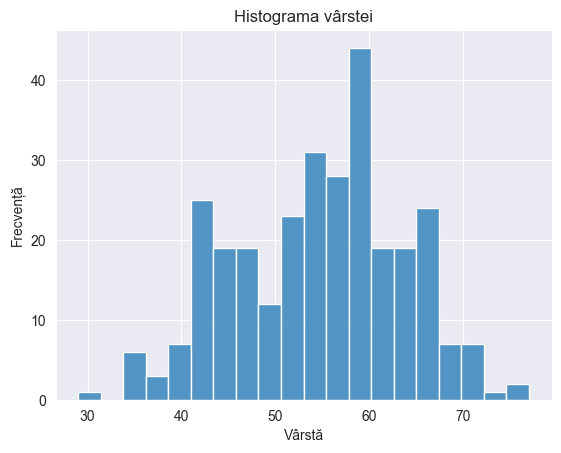

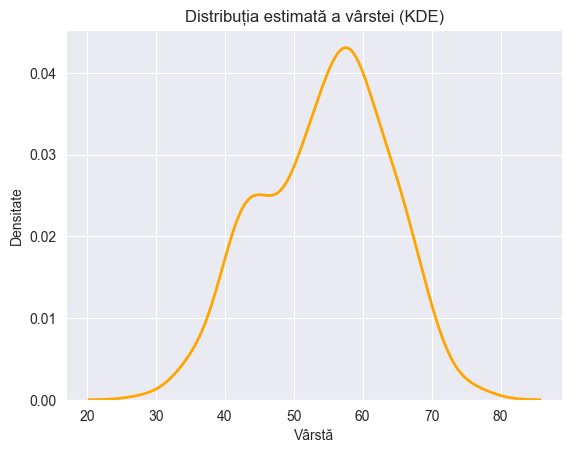

In [128]:
sns.histplot(data_frame["varsta"], bins=20)
plt.title("Histograma vârstei")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["varsta"], color='orange', linewidth=2)
plt.title("Distribuția estimată a vârstei (KDE)")
plt.xlabel("Vârstă")
plt.ylabel("Densitate")
plt.show()

**CONCLUZII:**
- Vârstele variază între aproximativ 30 și 75 de ani.
- Nu par să existe outlieri extremi sau valori aberante.
- Vârsta cea mai frecventă pare să fie în jur de 60 de ani(cea mai ridicată în histogramă și vârful în KDE).

### Analiza univariată a sexului

Variabila sex indică genul pacienților și este codificată binar, unde 0 corespunde femeilor, iar 1 bărbaților. În cadrul analizei univariate, ne propunem să observăm distribuția acestei variabile pentru a înțelege cum este împărțit eșantionul din punct de vedere al genului.

Pentru această analiză, a fost realizat un `countplot()`, care evidențiază frecvența fiecărei categorii și permite detectarea eventualelor dezechilibre între sexe.

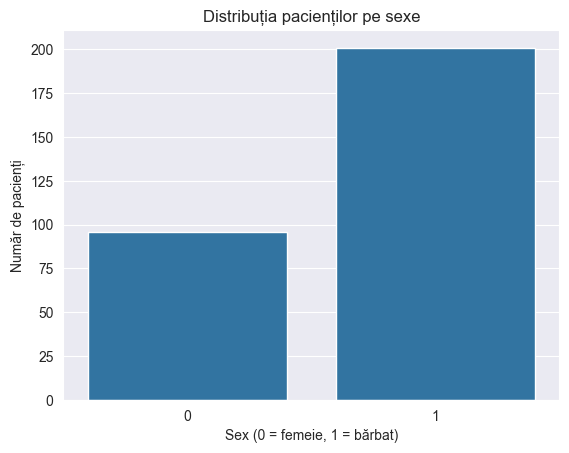

In [129]:
sns.countplot(x="sex", data=data_frame)
plt.title("Distribuția pacienților pe sexe")
plt.xlabel("Sex (0 = femeie, 1 = bărbat)")
plt.ylabel("Număr de pacienți")
plt.show()

**CONCLUZII:**
- Se observă un dezechilibru semnificativ între cele două categorii de gen
- Numărul pacienților de sex masculin (1) este aproximativ dublu față de cel al pacienților de sex feminin (0).

### Analiza univariată a tipului de durere in piept

Variabila tip_durere_in_piept descrie tipul durerii în piept resimțită de pacienți și este o variabilă categorială, codificată numeric. Fiecare valoare corespunde unui tip specific de durere, astfel:
- 0 – durere tip angină tipică
- 1 – durere tip angină atipică
- 2 – durere non-anginoasă
- 3 – asimptomati

În cadrul analizei univariate, ne propunem să examinăm distribuția acestei variabile pentru a înțelege care tipuri de durere în piept sunt cel mai frecvent raportate în eșantion.

Pentru această analiză, a fost utilizată funcția countplot(), care evidențiază frecvența fiecărei categorii și ajută la identificarea eventualelor dezechilibre între diferitele tipuri de durere în piept.

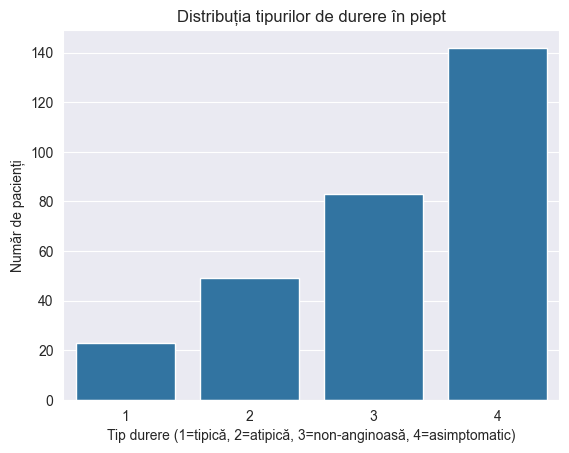

In [130]:
sns.countplot(x="tip_durere_piept", data=data_frame)
plt.title("Distribuția tipurilor de durere în piept")
plt.xlabel("Tip durere (1=tipică, 2=atipică, 3=non-anginoasă, 4=asimptomatic)")
plt.ylabel("Număr de pacienți")
plt.show()


**CONCLUZII:**
- În urma analizei distribuției variabilei tip_durere_in_piept, se observă că cea mai frecventă categorie este cea asociată cu durerea de altă natură, adesea interpretată ca stare asimptomatică. Aceasta sugerează că un număr semnificativ de pacienți nu prezintă simptome tipice de durere în piept

### Analiza univariată a tensiunii in repaus

Variabila tensiune_repaus reprezintă tensiunea arterială a pacienților în stare de repaus și este o variabilă numerică continuă. Analiza acestei variabile ne permite să înțelegem distribuția valorilor tensiunii arteriale în cadrul eșantionului și să identificăm eventuale valori anormale sau tendințe generale.

Pentru această analiză univariată, a fost construită o histogramă împreună cu o curbă de densitate (KDE), care oferă o imagine clară atât asupra frecvenței valorilor, cât și asupra formei distribuției.

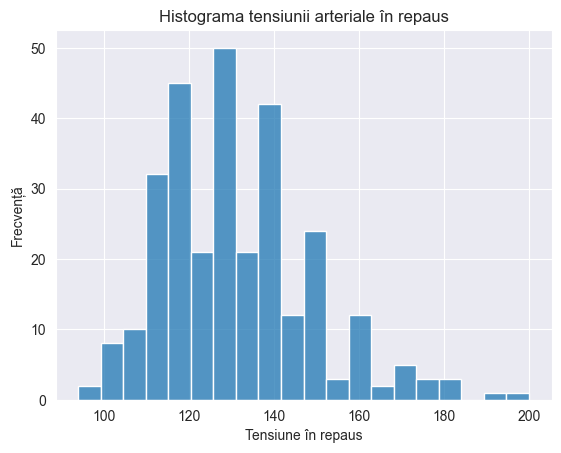

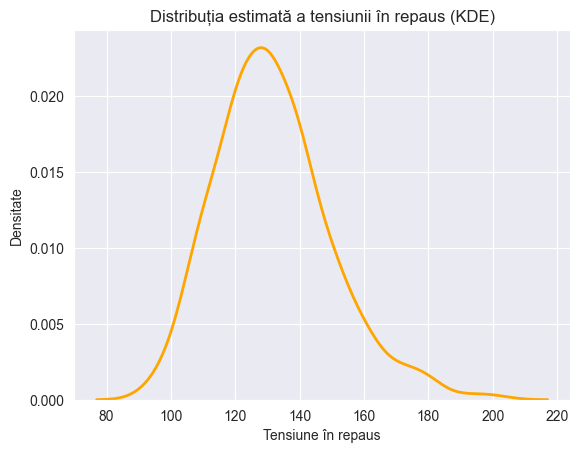

In [131]:
sns.histplot(data_frame["tensiune_repaus"], bins=20)
plt.title("Histograma tensiunii arteriale în repaus")
plt.xlabel("Tensiune în repaus")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["tensiune_repaus"], color='orange', linewidth=2)
plt.title("Distribuția estimată a tensiunii în repaus (KDE)")
plt.xlabel("Tensiune în repaus")
plt.ylabel("Densitate")
plt.show()


În cadrul analizei variabilei tensiune_repaus, au fost identificate valori care depășesc pragul clinic de **160 mmHg**, considerat limita superioară pentru **hipertensiunea de gradul 2**. Cele mai ridicate valori din setul de date ajung până la **200 mmHg**. Deși aceste valori pot fi considerate extreme, ele nu sunt neapărat **outlieri eronați**, ci pot reflecta situații clinice critice, precum episoade de **hipertensiune severă**. Prin urmare, s-a decis păstrarea acestor observații în analiză, întrucât pot oferi informații relevante despre cazurile grave.

Pacienții care prezintă valori ridicate ale tensiunii arteriale în repaus pot fi observați prin rularea următoarei **secvențe de cod**:


In [132]:
data_frame[data_frame['tensiune_repaus']>160].sort_values('tensiune_repaus', ascending=False)

,varsta,sex,tip_durere_piept,tensiune_repaus,colesterol,glicemie,ekg_repaus,frecventa_maxima,angina_efort,depresie_st,panta_st,vase_principale_colorate,talasemie,boala_inima
126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0,3
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1
83,68,1,3,180,274,1,2,150,1,1.6,2,0.0,7.0,3
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0,0
231,55,0,4,180,327,0,1,117,1,3.4,2,0.0,3.0,2
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
213,66,0,4,178,228,1,0,165,1,1.0,2,2.0,7.0,3
172,59,0,4,174,249,0,0,143,1,0.0,2,0.0,3.0,1
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
68,59,1,4,170,326,0,2,140,1,3.4,3,0.0,7.0,2


### Analiza univariată a colesterolului

Variabila colesterol reprezintă nivelul colesterolului seric al pacienților, exprimat în mg/dl, și este o variabilă numerică continuă. Pentru această analiză, a fost utilizată o histogramă însoțită de o curbă de densitate (KDE), care oferă o imagine detaliată asupra formei distribuției și permite observarea abaterilor de la o distribuție normală, precum și prezența potențială a valorilor atipice.

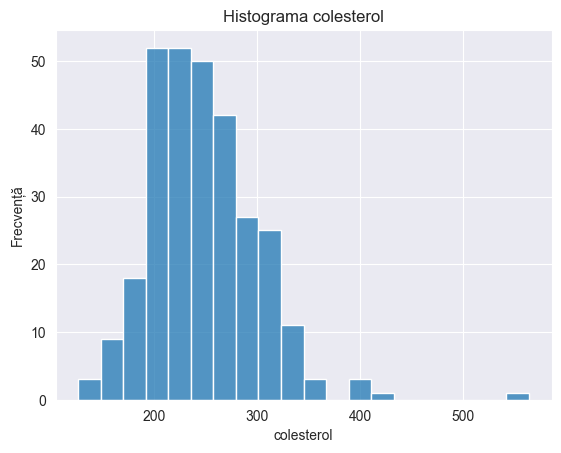

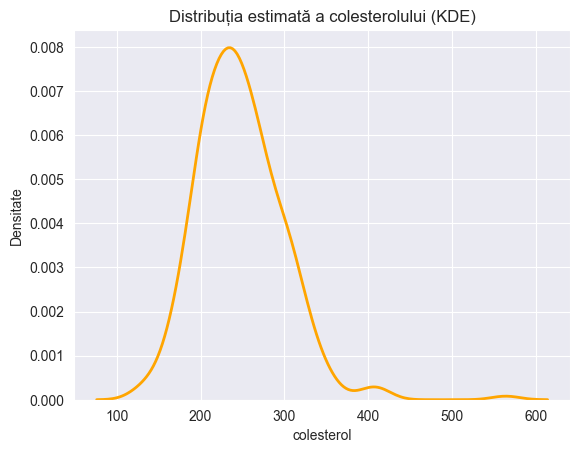

In [133]:
sns.histplot(data_frame["colesterol"], bins=20)
plt.title("Histograma colesterol")
plt.xlabel("colesterol")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["colesterol"], color='orange', linewidth=2)
plt.title("Distribuția estimată a colesterolului (KDE)")
plt.xlabel("colesterol")
plt.ylabel("Densitate")
plt.show()

Am identificat în setul de date conform histogramei si KDE-ului o valoare a colesterolului seric care depășește 500 mg/dl, considerată un outlier semnificativ. Această valoare este mult peste intervalul normal și poate afecta negativ analizele și modelele ulterioare. Pentru a asigura o calitate mai bună a datelor, vom elimina aproximativ 5% dintre cele mai mari valori ale colesterolului, astfel reducând impactul acestor valori extreme asupra rezultatelor.

In [134]:
q = data_frame["colesterol"].quantile(0.95)
data_frame = data_frame[data_frame["colesterol"] <= q]

Pentru a evalua impactul valorilor extreme asupra distribuției variabilei colesterol, am realizat din nou **histograma** și **curba de densitate (KDE)** după excluderea outlierilor, adică a valorilor ce depășesc pragul de 330 mg/dl. Comparativ cu analiza inițială, distribuția rezultată prezintă o formă mai echilibrată și o variabilitate redusă, evidențiind astfel o diferență considerabilă în comportamentul datelor odată ce valorile atipice au fost eliminate.

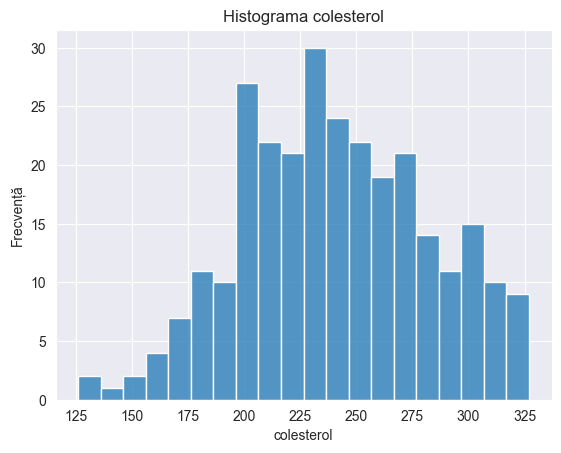

Text(0, 0.5, 'Densitate')

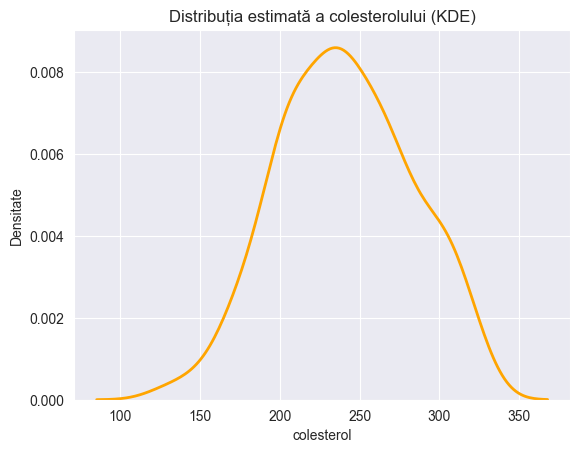

In [135]:
sns.histplot(data_frame["colesterol"], bins=20)
plt.title("Histograma colesterol")
plt.xlabel("colesterol")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["colesterol"], color='orange', linewidth=2)
plt.title("Distribuția estimată a colesterolului (KDE)")
plt.xlabel("colesterol")
plt.ylabel("Densitate")

Această ajustare ne permite să obținem o distribuție mai echilibrată și să evităm influența acestor valori extreme asupra rezultatelor statistice și a modelelor predictive.

### Analiza univariată a glicemiei

Pentru a evalua frecvența pacienților cu glicemie crescută, am realizat un countplot pe o variabilă binară derivată din glicemie, unde valoarea 1 indică glicemie peste **120 mg/dl**, iar 0 indică glicemie normală (sub 120 mg/dl). Această reprezentare vizuală ne permite să observăm proporția pacienților cu niveluri ridicate de glicemie în eșantion și să identificăm eventuale dezechilibre între cele două categorii

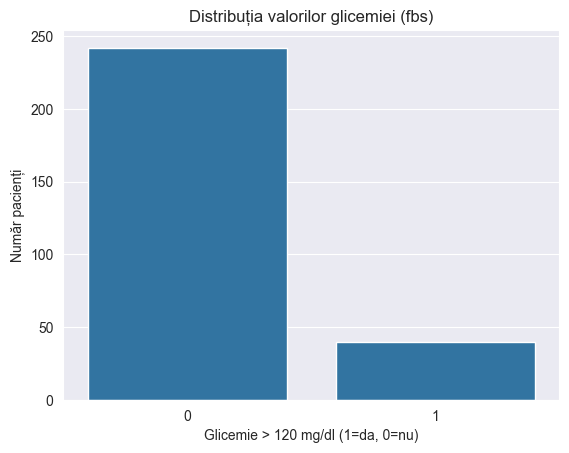

In [136]:
sns.countplot(x=data_frame["glicemie"])
plt.title("Distribuția valorilor glicemiei (fbs)")
plt.xlabel("Glicemie > 120 mg/dl (1=da, 0=nu)")
plt.ylabel("Număr pacienți")
plt.show()

Pentru a afla câți pacienți au glicemia sub 120 mg/dl, putem folosi următoarea comandă în Python:

In [137]:
numar_pacienti = data_frame[data_frame['glicemie'] == 1].shape[0]
print(numar_pacienti)

40


**CONCLUZII:**
- Din analiza variabilei binare asociate glicemiei, observăm că peste 200 de pacienți au valori ale glicemiei sub pragul de 120 mg/dl, ceea ce indică o proporție semnificativă de persoane cu niveluri normale sau controlate ale glicemiei.


### Analiza univariată a EKG-ului in repaus

Variabila ekg_repaus reflectă rezultatul electrocardiogramei realizate în repaus și este de tip categoric, cu următoarea semnificație a valorilor:
- 0 = EKG normal
- 1 = Anomalii ale undelor ST-T
- 2 = Hipertrofie ventriculară stângă

Pentru a analiza distribuția acestor categorii în eșantion, a fost realizat un countplot, care evidențiază frecvența fiecărui tip de rezultat.

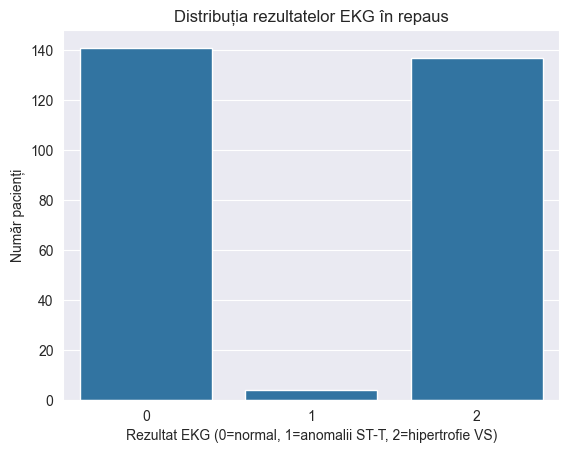

In [138]:
sns.countplot(x=data_frame["ekg_repaus"], data=data_frame)
plt.title("Distribuția rezultatelor EKG în repaus")
plt.xlabel("Rezultat EKG (0=normal, 1=anomalii ST-T, 2=hipertrofie VS)")
plt.ylabel("Număr pacienți")
plt.show()


Pacienți cu EKG normal (cod 0):

In [139]:
nr_pacienti = data_frame[data_frame['ekg_repaus'] == 0].shape[0]
print(nr_pacienti)

141


Pacienți cu anomalii ST-T (cod 1):

In [140]:
pacienti_ekg_st_t = data_frame[data_frame['ekg_repaus'] == 1].shape[0]
print(pacienti_ekg_st_t)


4


Pacienți cu hipertrofie(cod 2):

In [141]:
pacienti_ekg_hvs = data_frame[data_frame['ekg_repaus'] == 2].shape[0]
print(pacienti_ekg_hvs)

137


**CONCLUZII:**
- În urma analizei distribuției variabilei ekg_repaus, se observă că numărul pacienților cu EKG normal (cod 0) este apropiat de cel al pacienților diagnosticați cu hipertrofie ventriculară(cod 2). Această similitudine sugerează că în eșantionul analizat există un echilibru relativ între pacienții cu rezultate normale și cei cu semne de afectare structurală a inimii.

### Analiza univariată a frecvenței cardiace maxime atinsă în timpul testului de efort

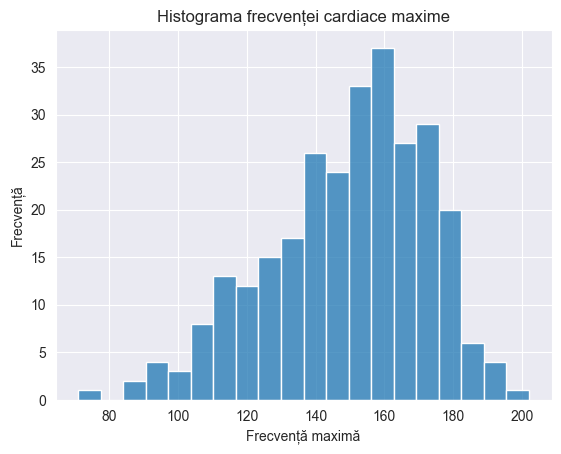

Text(0, 0.5, 'Densitate')

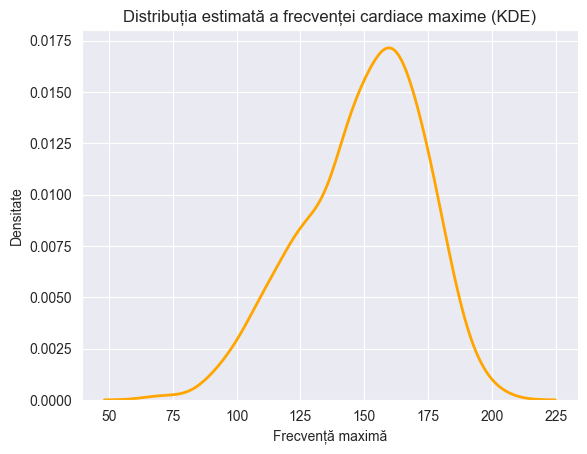

In [142]:
sns.histplot(data_frame["frecventa_maxima"], bins=20)
plt.title("Histograma frecvenței cardiace maxime")
plt.xlabel("Frecvență maximă")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["frecventa_maxima"], color='orange', linewidth=2)
plt.title("Distribuția estimată a frecvenței cardiace maxime (KDE)")
plt.xlabel("Frecvență maximă")
plt.ylabel("Densitate")



Pentru a identifica valorile atipice din variabila frecventa_maxima, am aplicat metoda bazată pe intervalul intercuartilic (IQR – Interquartile Range). Această tehnică statistică este utilizată frecvent în analiza exploratorie a datelor pentru a detecta observațiile care se abat semnificativ de la distribuția generală a variabilei.

Concret, am calculat primul cuartil (Q1 – percentila 25%) și al treilea cuartil (Q3 – percentila 75%), iar diferența dintre ele (IQR = Q3 - Q1) a fost folosită pentru a stabili limitele în afara cărora valorile pot fi considerate outlieri:

Limita inferioară: Q1 - 1.5 × IQR

Limita superioară: Q3 + 1.5 × IQR

In [143]:
q1 = data_frame['frecventa_maxima'].quantile(0.25)
q3 = data_frame['frecventa_maxima'].quantile(0.75)
iqr = q3 - q1

limita_inferioara = q1 - 1.5 * iqr
limita_superioara = q3 + 1.5 * iqr

print(f"Outlieri sunt sub {limita_inferioara:.2f} sau peste {limita_superioara:.2f}")


Outlieri sunt sub 81.62 sau peste 216.62


Eliminam valorile atipice din `frecventa_maxima`, conform rezultatelor metodei IQR

In [144]:
data_frame = data_frame[
    (data_frame['frecventa_maxima'] >= limita_inferioara) &
    (data_frame['frecventa_maxima'] <= limita_superioara)
]

După eliminarea valorilor atipice din variabila frecventa_maxima, am refăcut histogramă și curba KDE pentru a observa cum se modifică distribuția datelor. Prin această ajustare, vizualizările oferă o imagine mai precisă și mai curată a comportamentului general al variabilei, fără influența valorilor extreme care pot distorsiona interpretarea.

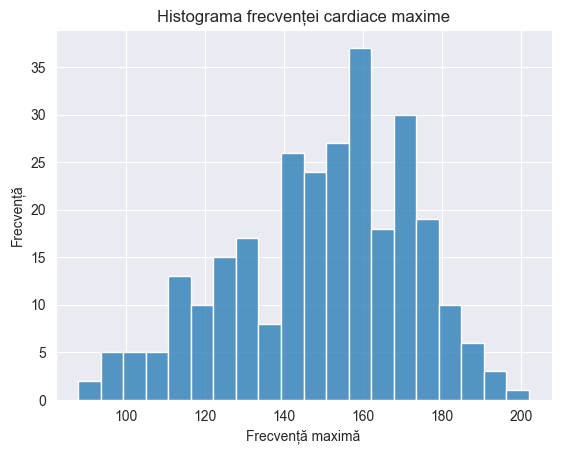

Text(0, 0.5, 'Densitate')

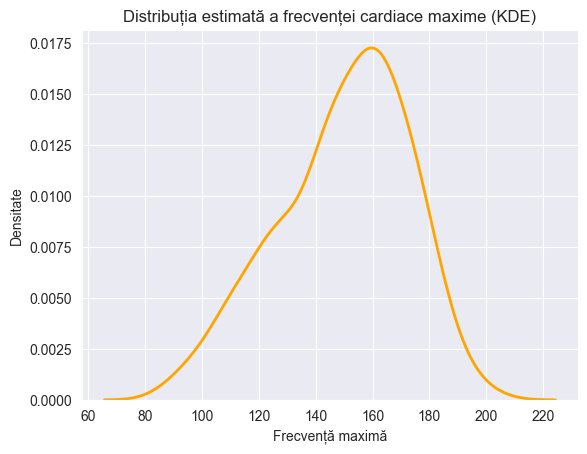

In [145]:
sns.histplot(data_frame["frecventa_maxima"], bins=20)
plt.title("Histograma frecvenței cardiace maxime")
plt.xlabel("Frecvență maximă")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["frecventa_maxima"], color='orange', linewidth=2)
plt.title("Distribuția estimată a frecvenței cardiace maxime (KDE)")
plt.xlabel("Frecvență maximă")
plt.ylabel("Densitate")

**CONCLUZII:**
- Distribuția frecvenței cardiace maxime prezintă o formă aproximativ normală, cu o concentrare majoritară a valorilor în jurul valorii medii.
- Eliminarea outlierilor a redus dispersia datelor și a evidențiat o distribuție mai omogenă, ceea ce facilitează interpretarea corectă a tendințelor din eșantion.

### Analiza univariată a anginei

Variabila angina_efor indică prezența anginei pectorale în timpul efortului fizic și este o variabilă binară, codificată astfel:

- 0 = absența anginei
- 1 = prezența anginei

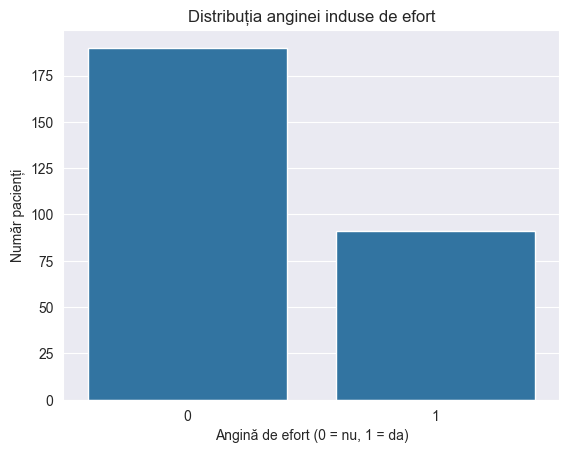

In [146]:
sns.countplot(x="angina_efort", data=data_frame)
plt.title("Distribuția anginei induse de efort")
plt.xlabel("Angină de efort (0 = nu, 1 = da)")
plt.ylabel("Număr pacienți")
plt.show()


**CONCLUZII:**
- Analiza distribuției variabilei angina_efor arată că majoritatea pacienților din eșantion nu au manifestat angină în timpul efortului fizic, în timp ce un procent mai mic a prezentat această simptomatologie. Astfel, pacienții fără angină sunt mai numeroși decât cei care au experimentat angină la efort.

### Analiza univariată a depresiei ST

Variabila depresie_st măsoară modificările segmentului ST în electrocardiogramă, un indicator important în evaluarea ischemiei miocardice. Aceasta este o variabilă numerică continuă, iar analiza univariată ne ajută să înțelegem modul în care valorile acestei variabile se distribuie în eșantionul studiat.

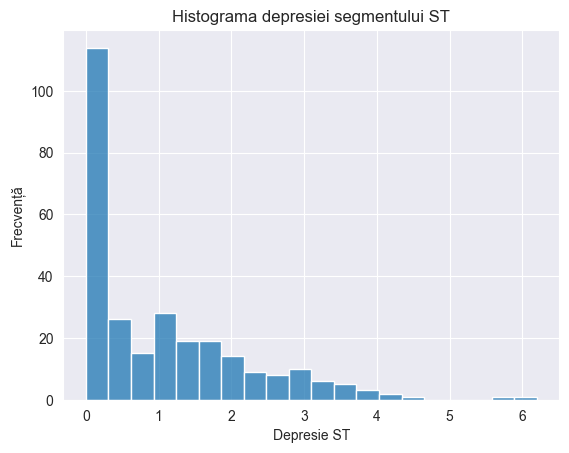

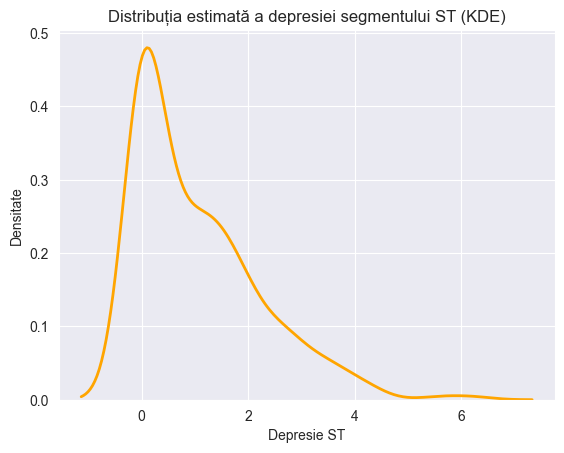

In [147]:
sns.histplot(data_frame["depresie_st"], bins=20)
plt.title("Histograma depresiei segmentului ST")
plt.xlabel("Depresie ST")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["depresie_st"], color='orange', linewidth=2)
plt.title("Distribuția estimată a depresiei segmentului ST (KDE)")
plt.xlabel("Depresie ST")
plt.ylabel("Densitate")
plt.show()

În analiza variabilei depresie_st am observat prezența unor valori extreme (outlieri) care pot influența interpretarea datelor. Pentru a determina pragurile exacte ale acestor valori atipice, am aplicat metoda intervalului intercuartilic (IQR). Aceasta ne permite să identificăm limitele în afara cărora valorile pot fi considerate outlieri și, astfel, să luăm decizia de a elimina aceste valori pentru o analiză mai precisă și reprezentativă.

In [148]:
q1 = data_frame['depresie_st'].quantile(0.25)
q3 = data_frame['depresie_st'].quantile(0.75)
iqr = q3 - q1

limita_inferioara = q1 - 1.5 * iqr
limita_superioara = q3 + 1.5 * iqr

print(f"Outlieri sunt sub {limita_inferioara:.2f} sau peste {limita_superioara:.2f}")


Outlieri sunt sub -2.40 sau peste 4.00


Eliminăm valorile atipice (outlierii) din variabila depresie_st pentru a asigura o analiză mai corectă și reprezentativă a datelor.

In [149]:
data_frame = data_frame[
    (data_frame['depresie_st'] >= limita_inferioara) &
    (data_frame['depresie_st'] <= limita_superioara)
]

După eliminarea valorilor atipice din depresie_st, refacem histograma și curba KDE pentru a observa cum se modifică distribuția datelor.

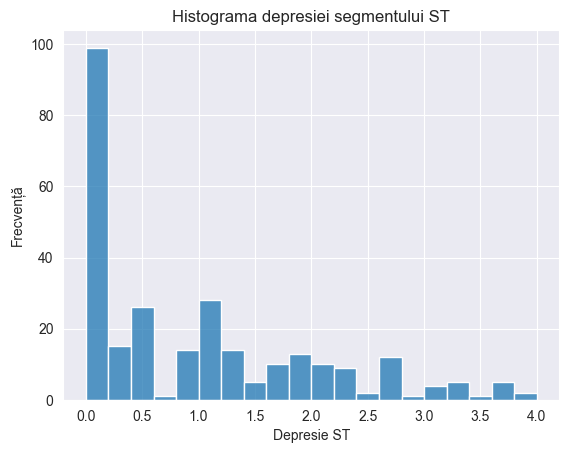

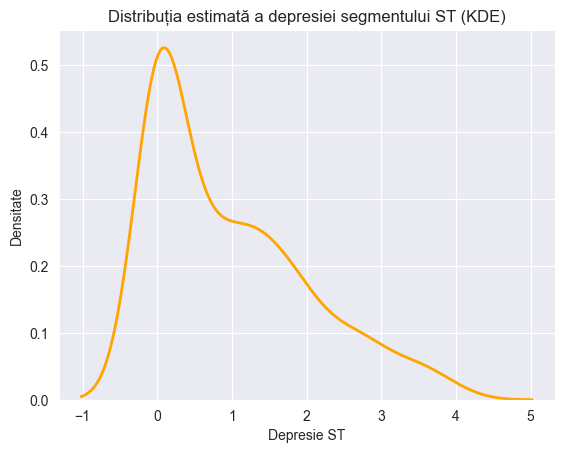

In [150]:
sns.histplot(data_frame["depresie_st"], bins=20)
plt.title("Histograma depresiei segmentului ST")
plt.xlabel("Depresie ST")
plt.ylabel("Frecvență")
plt.show()

sns.kdeplot(data_frame["depresie_st"], color='orange', linewidth=2)
plt.title("Distribuția estimată a depresiei segmentului ST (KDE)")
plt.xlabel("Depresie ST")
plt.ylabel("Densitate")
plt.show()

### Analiza univariată a pantei ST

Variabila panta_st reprezintă tipul pantei segmentului ST în electrocardiogramă, fiind codificată pe trei categorii: 1 pentru pantă ascendentă, 2 pentru pantă plată și 3 pentru pantă descendentă. Aceasta oferă informații esențiale despre modificările electrice ale inimii în timpul testului de efort.

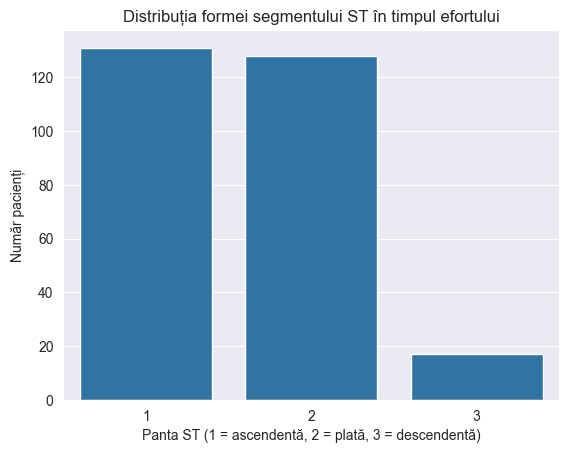

In [151]:
sns.countplot(x="panta_st", data=data_frame)
plt.title("Distribuția formei segmentului ST în timpul efortului")
plt.xlabel("Panta ST (1 = ascendentă, 2 = plată, 3 = descendentă)")
plt.ylabel("Număr pacienți")
plt.show()


**CONCLUZII:**
- Analiza distribuției variabilei panta_st arată că există un număr similar de pacienți cu pantă ascendentă și pantă plată, fiecare categorie având peste 100 de cazuri în eșantion. Aceasta indică faptul că aceste două tipuri de modificări ale segmentului ST sunt frecvent întâlnite în cadrul populației studiate.

### Analiza univariată vaselor principale colorate prin fluoroscopie

Variabila vase_principale_colorate indică numărul de vase principale colorate prin **fluoroscopie**, un indicator relevant în evaluarea extinderii **bolii coronariene**. Aceasta este o variabilă categorială numerică, cu valori între 0 și 3, reprezentând numărul de vase observate clar în urma investigației.

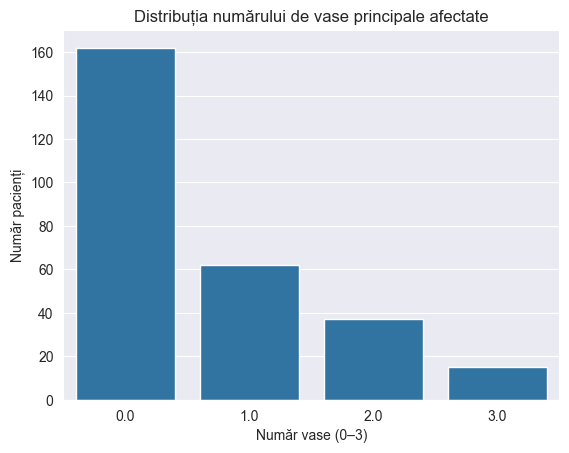

In [152]:
sns.countplot(x=data_frame["vase_principale_colorate"], data=data_frame)
plt.title("Distribuția numărului de vase principale afectate")
plt.xlabel("Număr vase (0–3)")
plt.ylabel("Număr pacienți")
plt.show()


**CONCLUZII:**
Analiza distribuției variabilei vase_principale_colorate arată că majoritatea pacienților, mai exact **peste 150**, au un număr de **0 vase principale colorate**, ceea ce sugerează că în multe cazuri nu au fost evidențiate vase coronariene afectate vizibil prin fluoroscopie.

### Analiza univariată a talasemiei

Variabila talasemie reflectă tipul de defect talasemic identificat la pacienți și este codificată categorial astfel:
- 3 = normal
- 6 = fix
- 7 = reversibil

Această variabilă oferă informații relevante privind posibile anomalii de perfuzie miocardică. Pentru a observa distribuția acestor categorii în eșantion, vom utiliza un countplot, care ne permite să analizăm frecvența fiecărui tip de talasemie și să identificăm predominanțele sau eventualele dezechilibre între clase.

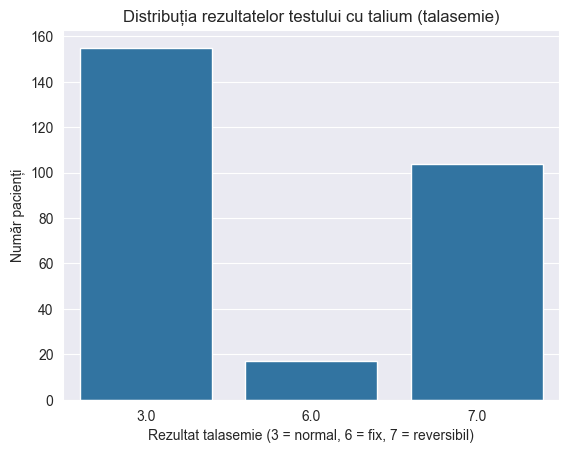

In [153]:
sns.countplot(x=data_frame["talasemie"], data=data_frame)
plt.title("Distribuția rezultatelor testului cu talium (talasemie)")
plt.xlabel("Rezultat talasemie (3 = normal, 6 = fix, 7 = reversibil)")
plt.ylabel("Număr pacienți")
plt.show()

**CONCLUZII:**
- Analiza distribuției variabilei talasemie evidențiază faptul că majoritatea pacienților prezintă valoarea 3, corespunzătoare unei condiții normale. Aceștia sunt urmați de pacienții cu valoarea 7 (defect reversibil), iar cei mai puțini au valoarea 6 (defect fix). Această distribuție sugerează că, în eșantionul studiat, formele normale și reversibile de talasemie sunt mai frecvent întâlnite decât cele fixe.

### Analiza univariată a target-ului boala_inima

Variabila target_inima reprezintă nivelul de afectare cardiacă, fiind un indicator al prezenței și severității unei boli de inimă. Aceasta este codificată numeric, cu valori de la 0 la 4, unde 0 indică absența bolii, iar valorile de la 1 la 4 reflectă diferite grade de severitate.

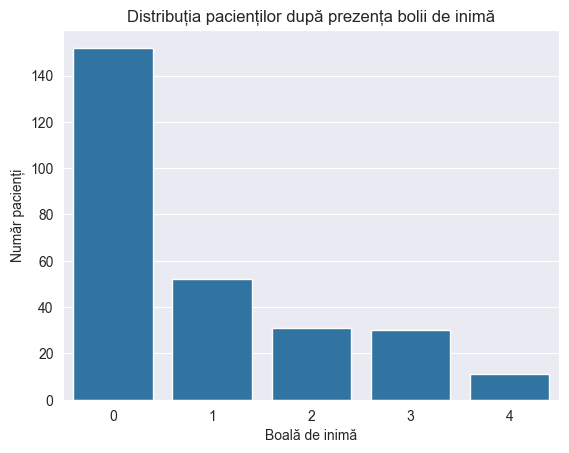

In [154]:
sns.countplot(x=data_frame["boala_inima"], data=data_frame)
plt.title("Distribuția pacienților după prezența bolii de inimă")
plt.xlabel("Boală de inimă")
plt.ylabel("Număr pacienți")
plt.show()


In [155]:
data_frame[data_frame['boala_inima'] == 0].shape[0]

152

**CONCLUZII:**
- Analiza distribuției variabilei target_inima arată că 152 de pacienți prezintă valoarea 0, ceea ce indică absența bolii cardiace. Aceștia reprezintă mai mult de jumătate din totalul eșantionului, sugerând că majoritatea pacienților din setul de date nu suferă de afecțiuni cardiace diagnosticate.

## Concluzii finale pentru explorare univariată a variabilelor

După aplicarea pașilor de curățare a datelor, cum ar fi eliminarea valorilor extreme, este esențial să reevaluăm distribuția variabilelor pentru a înțelege impactul acestor ajustări.

Vom utiliza din nou metoda `describe()` pentru a genera statistici descriptive asupra setului de date procesat. Aceste statistici actualizate permit observarea modificărilor în valorile centrale și în dispersia variabilelor. De exemplu, în cazul variabilei colesterol, eliminarea outlierilor a condus la o scădere a valorii maxime și o distribuție mai concentrată în jurul mediei. Astfel de schimbări pot fi remarcate și în alte variabile, reflectând o îmbunătățire generală a calității datelor.

Setul de date rezultat va fi utilizat ulterior pentru **antrenarea unui model de regresie**, unde variabilele prelucrate vor contribui la prezicerea severității afecțiunilor cardiace **(target_inima)**. Acest proces este esențial pentru obținerea unui model mai precis și mai fiabil.

In [156]:
data_frame.describe()

,varsta,sex,tip_durere_piept,tensiune_repaus,colesterol,glicemie,ekg_repaus,frecventa_maxima,angina_efort,depresie_st,panta_st,vase_principale_colorate,talasemie,boala_inima
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,54.188406,0.695652,3.130435,131.434783,240.391304,0.144928,0.989130,149.989130,0.322464,0.966667,1.586957,0.655797,4.692029,0.898551
std,9.162811,0.460967,0.971043,17.833964,41.698473,0.352667,0.996297,22.938572,0.468268,1.045707,0.605769,0.907145,1.932330,1.204777
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,209.750000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.500000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,60.250000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,327.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000


Se observă o scădere a valorii medii a colesterolului de la **247.35** la **240.61** în urma procesului de eliminare a valorilor extreme (outlieri). Această modificare indică faptul că setul de date inițial conținea valori semnificativ mari care influențau media, iar eliminarea acestora a condus la o reprezentare mai realistă și echilibrată a distribuției colesterolului în rândul pacienților

## 3.2 Explorare bivariată a variabilelor

În această etapă analizăm relațiile dintre perechi de variabile pentru a identifica corelații, asocieri sau tipare relevante. Aceasta ne ajută să înțelegem cum interacționează diferiți factori între ei și care dintre aceștia pot influența variabila țintă. Vom folosi grafice și măsuri statistice adecvate pentru variabile numerice și categorice.

**a) Relația dintre vârsta pacientului și tensiunea arterială**

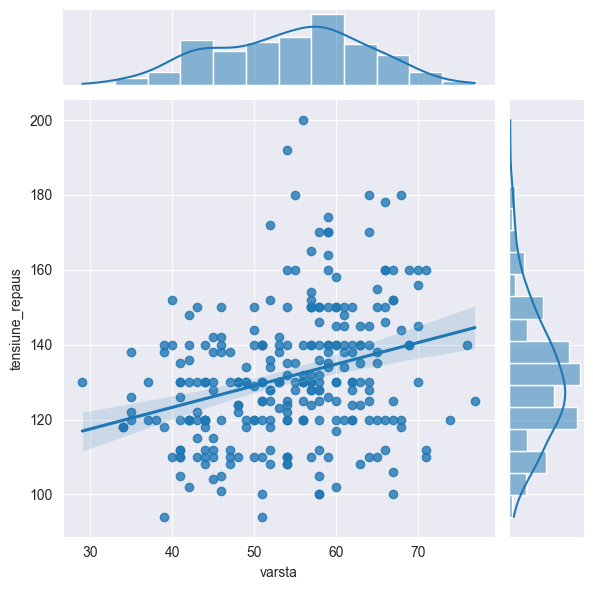

In [157]:
sns.jointplot(x="varsta", y="tensiune_repaus", data=data_frame, kind="reg")

**Tendința generală:**
Se observă o ușoară tendință de creștere a tensiunii arteriale odată cu înaintarea în vârstă. Pacienții mai în vârstă tind să aibă valori mai mari ale tensiunii arteriale comparativ cu cei mai tineri.

**b) Relația dintre colesterol și tensiunea arterială de repaus**

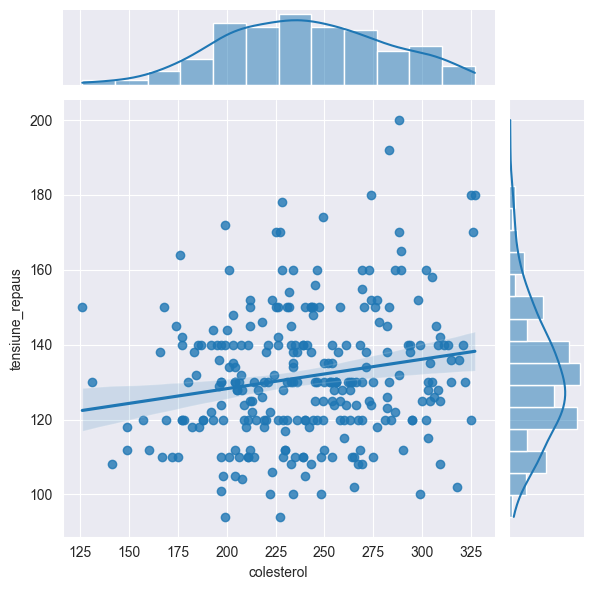

In [158]:
sns.jointplot(x="colesterol", y="tensiune_repaus", data=data_frame, kind="reg")

**Tendința generală:**
Observăm în grafic o tendință ușor ascendentă a punctelor, ceea ce indică o corelație pozitivă moderată între nivelul colesterolului și tensiunea arterială de repaus. Aceasta sugerează că, în general, pe măsură ce crește colesterolul, crește și tensiunea de repaus.

În cadrul acestui proiect, calculăm matricea de corelație pentru variabilele numerice din data_frame pentru a evidenția relațiile dintre factorii de risc cardiovascular, cum ar fi **colesterol**, **tensiune_repaus** și **varsta**. Prin analiza acestei matrice, vom putea identifica dacă există corelații puternice care ar putea sugera legături importante pentru interpretarea datelor clinice și pentru ghidarea unor analize statistice suplimentare.

In [159]:
data_frame[['varsta','colesterol','tensiune_repaus']].corr()

,varsta,colesterol,tensiune_repaus
varsta,1.000000,0.158918,0.295708
colesterol,0.158918,1.000000,0.183875
tensiune_repaus,0.295708,0.183875,1.000000


Analiza matricei de corelație indică faptul că, pe măsură ce crește vârsta, există o tendință ușoară ca și tensiunea de repaus să crească, dar relațiile nu sunt foarte puternice.

Reprezentarea grafică a matricei de corelație

<Axes: title={'center': 'Heatmap - Matricea de corelație între variabile'}>

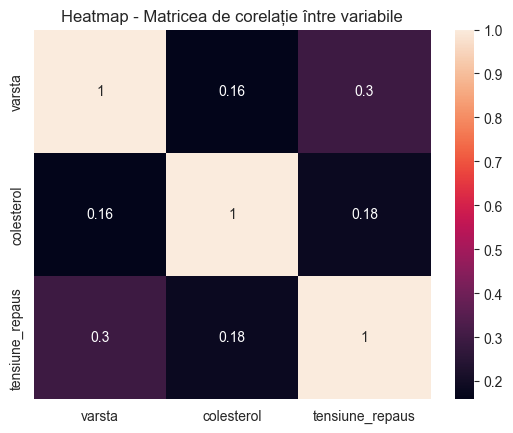

In [160]:
plt.title("Heatmap - Matricea de corelație între variabile")
sns.heatmap(data_frame[['varsta','colesterol','tensiune_repaus']].corr(), annot=True)

Analiza vizuală a matricei de corelație evidențiază relațiile semnificative dintre variabilele dataset-ului. Se observă corelații pozitive care pot ghida pașii următori în modelare sau selecție de caracteristici. Această reprezentare ajută la identificarea dependențelor și a potențialelor variabile redundante în cadrul datelor.

## 4. Antrenarea și evaluarea modelului de regresie liniară
În acest bloc pregătim datele, separăm variabila țintă boala_inima de restul caracteristicilor, scalăm numericile și codăm categoriile, apoi împărțim setul în train/test. Folosim un pipeline care realizează preprocesarea automat și antrenează un model de regresie liniară. La final, calculăm RMSE (root mean square error), MAE (mean absolute error) și R² (coeficientul de determinare) pentru a măsura acuratețea și capacitatea modelului de a generaliza pe date noi.

In [161]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data_frame.drop('boala_inima', axis=1)
y = data_frame['boala_inima']


numeric_features = [
    'varsta',
    'tensiune_repaus',
    'colesterol',
    'frecventa_maxima',
    'depresie_st'
]
categorical_features = [
    'sex',
    'glicemie',
    'angina_efort',
    'tip_durere_piept',
    'ekg_repaus',
    'panta_st',
    'vase_principale_colorate',
    'talasemie'
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

pipeline_lr = Pipeline(steps=[
    ('preproc', preprocessor),
    ('reg', LinearRegression())
])

# Antrenarea
pipeline_lr.fit(X_train, y_train)

# Prezicerea
y_pred = pipeline_lr.predict(X_test)

# Performanta
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"LinearRegression RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")


LinearRegression RMSE: 0.896, MAE: 0.676, R²: 0.487


### 4.1 Optimizarea hiperparametrilor cu GridSearchCV (Ridge & Lasso)
În această secțiune ajustăm valoarea penalizării pentru modelele de regresie Ridge (L2) și Lasso (L1) utilizând GridSearchCV cu validare în 5 fold-uri, astfel încât să găsim automat parametrul care minimizează eroarea pătratică medie și să îmbunătățim capacitatea de generalizare a modelului.

In [162]:
pipeline_ridge = Pipeline(steps=[
    ('preproc', preprocessor),
    ('ridge',   Ridge())
])
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
    pipeline_ridge,
    param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_ridge.fit(X_train, y_train)

print("Best Ridge α:", grid_ridge.best_params_['ridge__alpha'])

y_ridge    = grid_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_ridge))
r2_ridge   = r2_score(y_test, y_ridge)
print(f"Ridge RMSE: {rmse_ridge:.3f}, R²: {r2_ridge:.3f}")

pipeline_lasso = Pipeline(steps=[
    ('preproc', preprocessor),
    ('lasso',   Lasso(max_iter=5000))
])
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}

grid_lasso = GridSearchCV(
    pipeline_lasso,
    param_grid_lasso,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_lasso.fit(X_train, y_train)

print("Best Lasso α:", grid_lasso.best_params_['lasso__alpha'])

y_lasso     = grid_lasso.predict(X_test)
rmse_lasso  = np.sqrt(mean_squared_error(y_test, y_lasso))
r2_lasso    = r2_score(y_test, y_lasso)
print(f"Lasso RMSE: {rmse_lasso:.3f}, R²: {r2_lasso:.3f}")

Best Ridge α: 10
Ridge RMSE: 0.927, R²: 0.452
Best Lasso α: 0.01
Lasso RMSE: 0.920, R²: 0.460


### 4.2 Analiza și interpretarea coeficienților modelului Ridge optimizat
După ce am ales cel mai bun model Ridge prin GridSearchCV, extragem coeficienții asociați fiecărei caracteristici pentru a înțelege ce variabile au cea mai mare influență (pozitivă sau negativă) asupra predicției severității bolii cardiace.

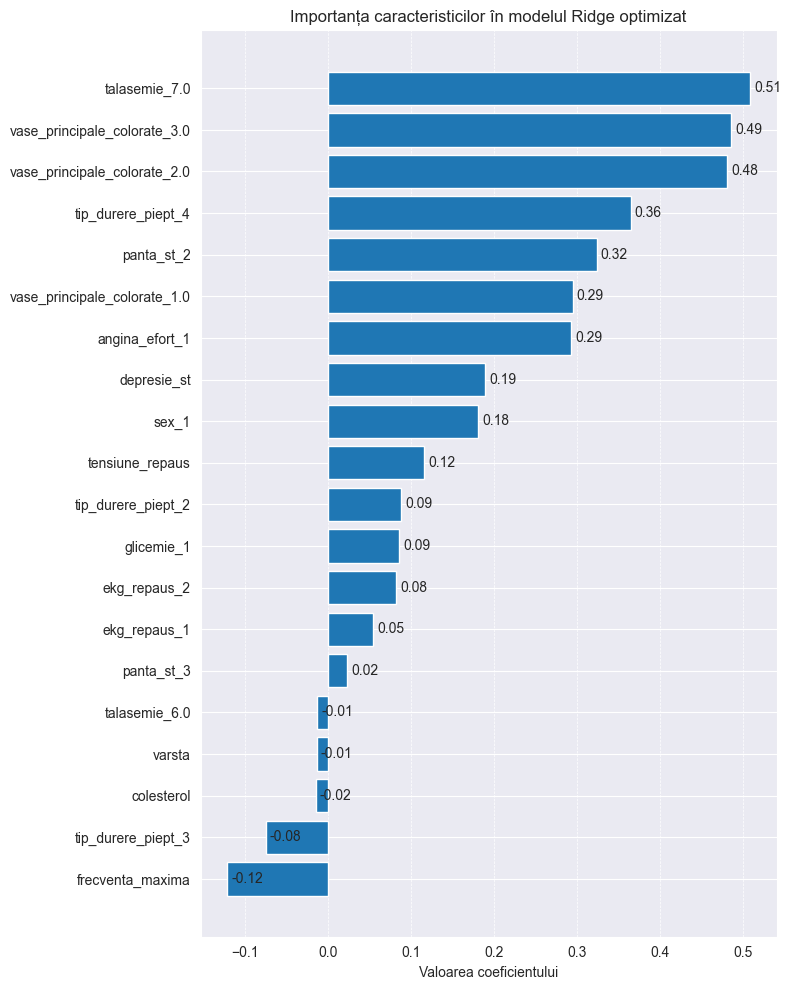

In [163]:
best_ridge = grid_ridge.best_estimator_

num_cols = numeric_features
cat_cols = best_ridge.named_steps['preproc'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)
all_features = np.concatenate([num_cols, cat_cols])

coefs = pd.Series(
    best_ridge.named_steps['ridge'].coef_,
    index=all_features
).sort_values()

plt.figure(figsize=(8, 10))
bars = plt.barh(coefs.index, coefs.values)
plt.title("Importanța caracteristicilor în modelul Ridge optimizat")
plt.xlabel("Valoarea coeficientului")
plt.grid(axis='x', linestyle='--', linewidth=0.5)

offset = max(coefs.values) * 0.01
for bar in bars:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x + offset, y, f"{x:.2f}", va="center")

plt.tight_layout()
plt.show()

## 5. Referințe
- McKinney, W. (2022). Python for Data Analysis (3rd ed.). O’Reilly Media.
- W3Schools, Pandas Tutorial. Link: https://www.w3schools.com/python/pandas/default.asp
- Cegeka Academy.Week 2 – Data Analysis with Python [Material de curs, PDF intern]
- Real Python, Pandas Tutorial: DataFrames in Python. Link: https://realpython.com/pandas-python-explore-dataset/
- Wikipedia, Interval intercuartilic. Link: https://ro.wikipedia.org/wiki/Interval_intercuartilic
- Drapala, J. Kernel Density Estimation Explained Step-by-Step, Towards Data Science. Link: https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517/
- Scikit-learn Developers, “What’s new in scikit-learn 1.2,” Scikit-learn release notes. Link:  https://scikit-learn.org/stable/whats_new/v1.2.html
- Trevor Hastie, Robert Tibshirani & Jerome Friedman (eds.), The Elements of Statistical Learning, 2nd ed. Electronic Edition, Springer, 2021.
- François Chollet, Deep Learning with Python, 2nd ed., Manning Publications, 2021. Link: https://www.manning.com/books/deep-learning-with-python-second-edition